In [2]:
import torch

X = torch.tensor(
    [
        [
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
        ],
        [
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 1, 1, 1, 1],
        ],
        [
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [0, 1, 1, 1, 0],
            [0, 0, 1, 0, 0],
        ],
        [
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
        ],
    ],
    dtype=torch.float,
)

In [3]:
y = torch.tensor([0, 1, 2, 3])
y

tensor([0, 1, 2, 3])

In [4]:
classes = {
    0: "L",
    1: "O",
    2: "V",
    3: "E",
}

In [5]:
print(classes[y[0].item()])
print(classes[y[1].item()])
print(classes[y[2].item()])
print(classes[y[3].item()])

L
O
V
E


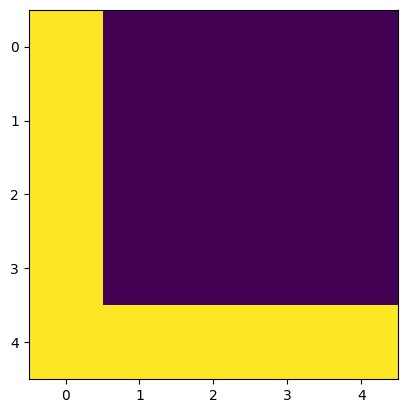

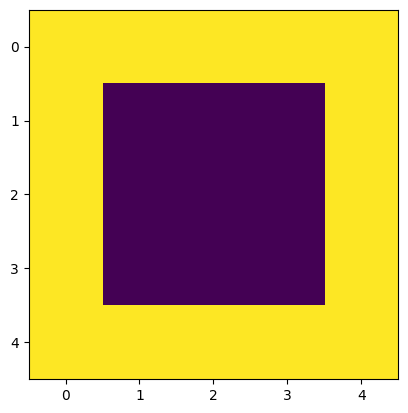

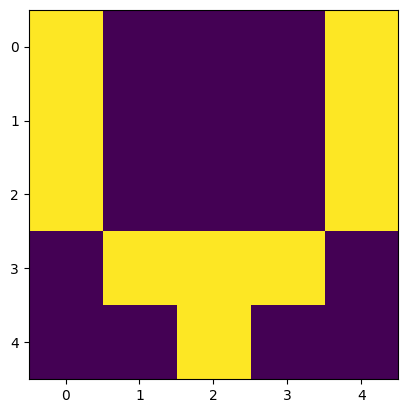

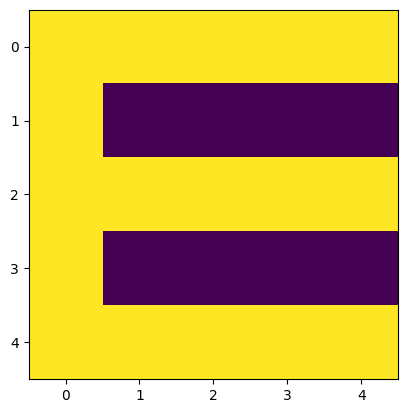

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X[0])
plt.show()
plt.imshow(X[1])
plt.show()
plt.imshow(X[2])
plt.show()
plt.imshow(X[3])
plt.show()

In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        # in_channels: グレースケール→1
        # in_channels: RGB→3
        self.conv1 = nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=2, stride=1, padding=1
        )
        # in_channels = 前のconvのout_channels
        self.conv2 = nn.Conv2d(
            in_channels=6, out_channels=6, kernel_size=2, stride=1, padding=1
        )
        self.conv3 = nn.Conv2d(
            in_channels=6, out_channels=1, kernel_size=2, stride=1, padding=1
        )
        self._to_linear = None

        x = torch.rand(5, 5).view(-1, 1, 5, 5)
        self.convs(x)
        self.fc1 = nn.Linear(self._to_linear, 16)
        self.fc2 = nn.Linear(16, 16)
        # out_features: 4
        self.fc3 = nn.Linear(16, 4)

    def convs(self, x):
        x = F.max_pool2d(self.conv1(x), (2, 2))
        x = F.max_pool2d(self.conv2(x), (2, 2))
        x = F.max_pool2d(self.conv3(x), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0] * x[0].shape[2]
            print(self._to_linear)

        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=0.1)
        x = self.fc3(x)

        return x

In [9]:
net = CNN()

1


In [10]:
net(X[0].view(-1, 1, 5, 5))

tensor([[ 0.2377,  0.1824,  0.0704, -0.1267]], grad_fn=<AddmmBackward0>)

In [11]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.002, weight_decay=0.0001)
epochs = 300

In [12]:
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(X.view(-1, 1, 5, 5))
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss)

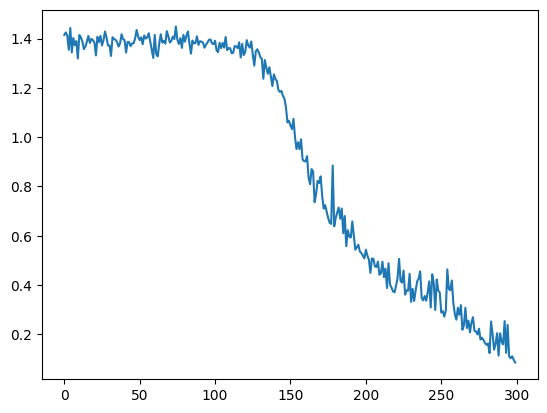

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

losses = torch.tensor(losses)
plt.plot(losses)
plt.show()

In [14]:
def accuracy(x, y):
    """
    Args:
        x(tensor): 入力
        y(tensor): 正解

    Returns:
        accuracy(float): 正解率
    """

    return (net(x.view(-1, 1, 5, 5)).max(dim=1)[1] == y).sum().item() / len(y)

In [15]:
# 評価モードにしてseed固定
net.eval()
f"accuracy: {accuracy(X, y)}"

'accuracy: 1.0'

In [16]:
X_test = torch.tensor(
    [
        [
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 1],
            [1, 1, 1, 1, 1],
        ],
        [
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 1, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 1, 1, 1, 1],
        ],
    ],
    dtype=torch.float,
)

In [17]:
X_test

tensor([[[1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 0., 0., 0., 1.],
         [1., 0., 1., 0., 1.],
         [1., 0., 0., 0., 1.],
         [1., 1., 1., 1., 1.]]])

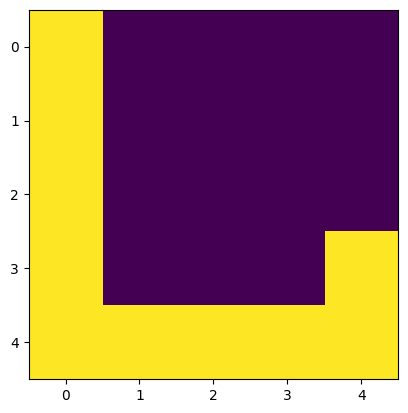

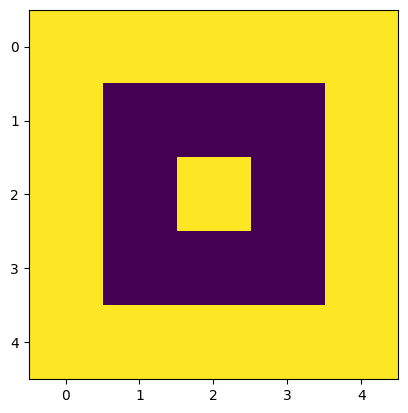

In [19]:
import matplotlib.pyplot as plt

plt.imshow(X_test[0])
plt.show()
plt.imshow(X_test[1])
plt.show()

In [24]:
y_test = torch.tensor([0, 1], dtype=torch.long)

In [26]:
net.eval()
print(f"accuracy: {accuracy(X_test[0], y_test)}")
print(f"accuracy: {accuracy(X_test[1], y_test)}")

accuracy: 0.5
accuracy: 0.5
